# Бонусный урок про вино 

In [10]:
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ls

Bonus_wine.ipynb                     optimiztion_w3.txt
Cat_Task.ipynb                       optimiztion_w3_1.txt
Func_approximation.ipynb             optimiztion_w3_2.txt
Linear_Algebra.ipynb                 optimiztion_w3_3.txt
Python_Practice_stepik.ipynb         result_cats.txt
Week1_Task1.ipynb                    s2.txt
Week_2.ipynb                         sample_distribution_evaluation.ipynb
Week_3_Optimiztion.ipynb             second_file.txt
data_sample_example.tsv              sentences.txt
local_file.txt                       stochastic_variables.ipynb
logo.png                             submissions.txt
loops.ipynb                          write_file.txt
matrix_operations.ipynb


In [6]:
wine = pd.read_csv('../Week_4/wine_data.csv', sep='\t')

In [8]:
wine.sample(frac=1)

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),Alcohol (%),quality
6117,white,9.0,0.20,0.33,3.50,0.049,10.0,40.0,0.99440,3.14,0.36,9.80,6
3205,white,7.5,0.32,0.49,1.70,0.031,44.0,109.0,0.99060,3.07,0.46,12.50,6
4079,white,6.8,0.32,0.30,1.00,0.049,22.0,113.0,0.99289,3.24,0.61,10.20,5
4020,white,6.8,0.26,0.43,11.75,0.045,53.0,198.0,0.99690,3.26,0.55,9.50,5
1064,red,8.2,0.74,0.09,2.00,0.067,5.0,10.0,0.99418,3.28,0.57,11.80,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,white,6.3,0.25,0.23,14.90,0.039,47.0,142.0,0.99705,3.14,0.35,9.70,6
5916,white,6.7,0.34,0.26,1.90,0.038,58.0,138.0,0.98930,3.00,0.47,12.20,7
6095,white,7.5,0.24,0.29,1.10,0.046,34.0,84.0,0.99020,3.04,0.39,11.45,6
4515,white,6.0,0.44,0.26,3.10,0.053,57.0,128.0,0.98982,3.22,0.39,12.70,6


In [13]:
wine.groupby('quality')['quality'].agg(lambda x: float(len(x))/wine.shape[0])

quality
3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: quality, dtype: float64

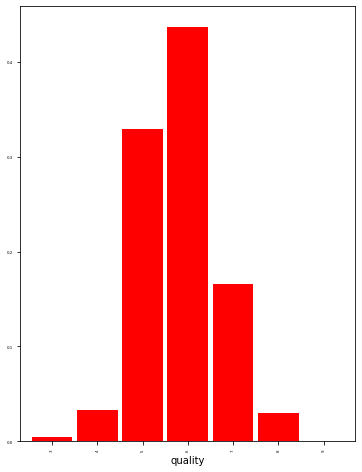

In [17]:
plt.figure(figsize=(6,8))
stat = wine.groupby('quality')['quality'].agg(lambda x: float(len(x))/wine.shape[0])
stat.plot(kind='bar', fontsize=4, width=0.9, color='r')
#plt.hist()